# データ解析の目的

年俸を多くもらっている選手は、どの指標と相関があるのか確認したい。

# 仮説

年俸を多くもらっている選手は、OPSと強い相関がある。

# 指標
年俸は推定年俸、選手を評価する指標は年齢・打率・本塁打・打点・OPSとする。

# データ集め・解析

In [1]:
import numpy as np
import pandas as pd 
import scipy as sp
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
data=pd.read_csv("baseball_salary.csv")

In [3]:
data.head()

,球団,推定年俸,守備,年数,年齢,身長,体重,血液型,投打,年,打率,試合,打席数,打数,安打,本塁打,打点,盗塁,四球,死球,三振,犠打,併殺打,出塁率,長打率,OPS,RC27,XR27,球団勝率,プレーオフ,球団平均得点,球団打率
0,c,21000,外野手,11,29,177,90,AB型,右左,2017,0.308,143,651,556,171,23,92,13,83,4,113,2,6,0.398,0.505,0.903,7.70,7.52,0.633,2,5.15,0.273
1,c,19000,内野手,7,28,171,72,A型,右右,2017,0.271,138,629,565,153,14,56,8,32,1,107,30,9,0.311,0.405,0.716,4.10,4.01,0.633,2,5.15,0.273
2,c,14000,内野手,5,29,171,85,A型,右左,2017,0.290,143,679,565,164,8,60,35,89,15,120,6,5,0.398,0.407,0.805,6.41,6.26,0.633,2,5.15,0.273
3,c,11500,内野手,7,38,196,126,不明,右右,2017,0.265,116,405,344,91,27,78,0,50,8,111,0,8,0.368,0.532,0.900,6.80,6.90,0.633,2,5.15,0.273
4,c,11000,内野手,20,41,189,102,B型,右右,2017,0.292,100,288,243,71,9,48,2,40,1,56,0,7,0.389,0.461,0.850,6.55,6.54,0.633,2,5.15,0.273


In [4]:
dataset=data[['推定年俸','年齢','打率','本塁打','打点','OPS']]
dataset=dataset.rename(columns={'推定年俸':'salary','年齢':'age','打率':'batting','本塁打':'homerun','打点':'points'})
dataset.head()

,salary,age,batting,homerun,points,OPS
0,21000,29,0.308,23,92,0.903
1,19000,28,0.271,14,56,0.716
2,14000,29,0.290,8,60,0.805
3,11500,38,0.265,27,78,0.900
4,11000,41,0.292,9,48,0.850


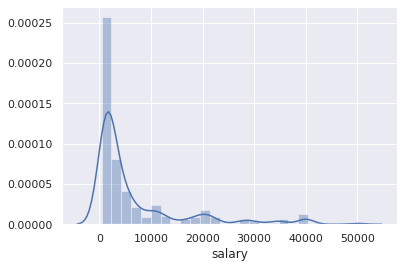

In [5]:
sns.distplot(dataset['salary'])

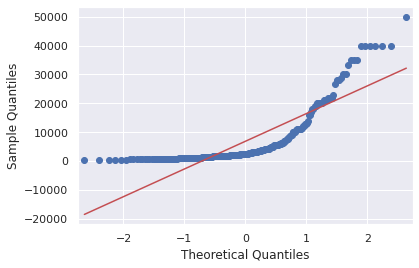

In [6]:
fig = sm.qqplot(dataset['salary'], line = 's')

In [7]:
dataset['salary']=np.log1p(dataset['salary'])

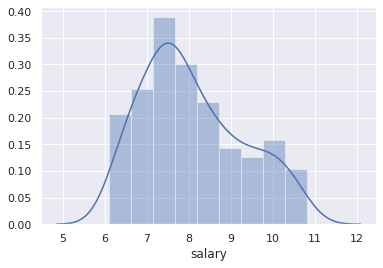

In [8]:
sns.distplot(dataset['salary'])

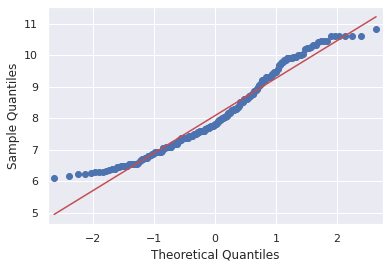

In [9]:
fig = sm.qqplot(dataset['salary'], line = 's')

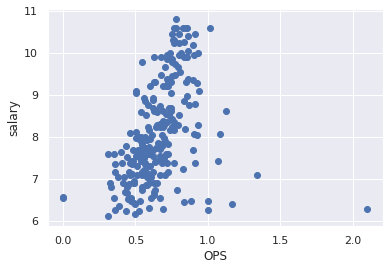

In [10]:
plt.scatter(dataset['OPS'],dataset['salary'])
plt.xlabel("OPS")
plt.ylabel("salary")
plt.show()

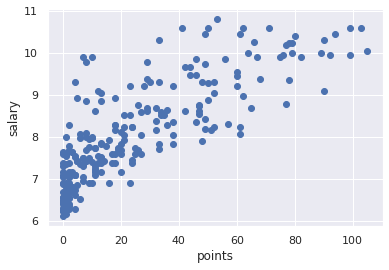

In [11]:
plt.scatter(dataset['points'],dataset['salary'])
plt.xlabel("points")
plt.ylabel("salary")
plt.show()

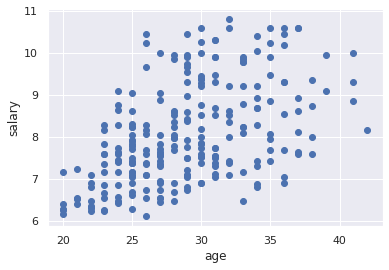

In [12]:
plt.scatter(dataset['age'],dataset['salary'])
plt.xlabel("age")
plt.ylabel("salary")
plt.show()

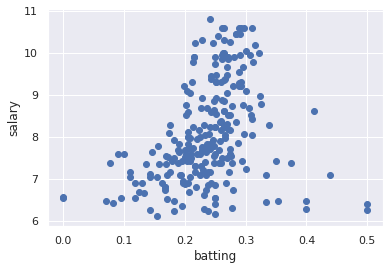

In [13]:
plt.scatter(dataset['batting'],dataset['salary'])
plt.xlabel("batting")
plt.ylabel("salary")
plt.show()

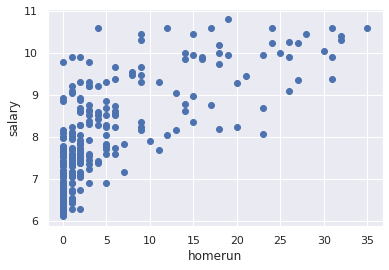

In [14]:
plt.scatter(dataset['homerun'],dataset['salary'])
plt.xlabel("homerun")
plt.ylabel("salary")
plt.show()

In [15]:
print(dataset.isnull().sum())

salary     0
age        0
batting    0
homerun    0
points     0
OPS        0
dtype: int64


In [16]:
model1=smf.ols(formula='salary~OPS',data=dataset).fit()

In [17]:
model2=smf.ols(formula='salary~OPS+homerun',data=dataset).fit()

In [18]:
model3=smf.ols(formula='salary~OPS+batting+points',data=dataset).fit()

In [19]:
model4=smf.ols(formula='salary~OPS+age+homerun+batting+points',data=dataset).fit()

In [20]:
print('Model-1:',model1.aic)
print('Model-2:',model2.aic)
print('Model-3:',model3.aic)
print('Model-4:',model4.aic)

Model-1: 731.9273151147936
Model-2: 603.1724484658491
Model-3: 522.2720900080938
Model-4: 446.2122354696296


In [21]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     140.2
Date:                Fri, 29 Oct 2021   Prob (F-statistic):           1.85e-68
Time:                        07:21:43   Log-Likelihood:                -217.11
No. Observations:                 241   AIC:                             446.2
Df Residuals:                     235   BIC:                             467.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8095      0.287     16.764      0.000       4.244       5.375
OPS            0.1789      0.394      0.454      0.650      -0.597       0.955
age            0.0807      0.009      9.452      0.000       0.064       0.098
homerun       -0.0100      0.013     -0.797      0.426      -0.035       0.015
batting       -0.0107      1.126     -0.010      0.992      -2.229       2.207
points         0.0353      0.004      9.084      0.000       0.028       0.043
==============================================================================
Omnibus:                       21.454   Durbin-Watson:                   1.500
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.511
Skew:                           0.677   Prob(JB):                     2.89e-06
Kurtosis:                       3.841   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 結論

OPSは係数0.1789と他の指標と比べて一番大きかったが、p値が0.650で有意に0と異なるとは言えず、結果に影響を与えたとは言えない。（相関があるとは言えない） ホームラン、打率もp値が0.05より大きいことから、有意に0と異なるとは言えず、結果に影響を与えたとは言えない。（相関があるとは言えない）

また、年齢は係数0.0807だが、p値は0.05を下回っており有意に0と異なると言えることから、年俸を多くもらっている選手と指標の中で一番大きな相関があることがわかる。（結果に影響を与えている） 同様に、打点も係数0.0353だが、p値は0.05を下回っていることから、年俸を多くもらっている選手と相関があることがわかる。（結果に影響を与えている）

In [22]:
threshold = 0.8

In [23]:
corr_matrix = dataset.corr().abs()
corr_matrix.head()

,salary,age,batting,homerun,points,OPS
salary,1.000000,0.499573,0.318410,0.709707,0.806189,0.388382
age,0.499573,1.000000,0.050730,0.178397,0.243494,0.061740
batting,0.318410,0.050730,1.000000,0.306300,0.385038,0.828622
homerun,0.709707,0.178397,0.306300,1.000000,0.910329,0.482759
points,0.806189,0.243494,0.385038,0.910329,1.000000,0.479441


In [24]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,salary,age,batting,homerun,points,OPS
salary,NaN,0.499573,0.31841,0.709707,0.806189,0.388382
age,NaN,NaN,0.05073,0.178397,0.243494,0.061740
batting,NaN,NaN,NaN,0.306300,0.385038,0.828622
homerun,NaN,NaN,NaN,NaN,0.910329,0.482759
points,NaN,NaN,NaN,NaN,NaN,0.479441


In [25]:
to_drop = [column for column in upper.columns if column != 'salary' if any(upper[column] > threshold)]

print('削除する変数：', to_drop)
print('削除する変数の数：', len(to_drop))

削除する変数： ['points', 'OPS']
削除する変数の数： 2


In [26]:
data_dropped = dataset.drop(columns = to_drop)
data_dropped.head()

,salary,age,batting,homerun
0,9.952325,29,0.308,23
1,9.852247,28,0.271,14
2,9.546884,29,0.290,8
3,9.350189,38,0.265,27
4,9.305741,41,0.292,9


In [27]:
X = dataset[['age','OPS','points','batting','homerun']]
y = dataset['salary']

In [28]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 2)

In [30]:
n_lambda = 50
ridge_lambdas = np.logspace(-3, 1, n_lambda)

In [31]:
model = RidgeCV(cv = 10, alphas = ridge_lambdas, fit_intercept = True)
model.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.20679264e-03, 1.45634848e-03, 1.75751062e-03,
       2.12095089e-03, 2.55954792e-03, 3.08884360e-03, 3.72759372e-03,
       4.49843267e-03, 5.42867544e-03, 6.55128557e-03, 7.90604321e-03,
       9.54095476e-03, 1.15139540e-02, 1.38949549e-02, 1.67683294e-02,
       2.02358965e-02, 2.44205309e-02, 2.94705170e-02, 3.55648031e-02,
       4.29193426e-02, 5.17947468e-0...
       9.10298178e-02, 1.09854114e-01, 1.32571137e-01, 1.59985872e-01,
       1.93069773e-01, 2.32995181e-01, 2.81176870e-01, 3.39322177e-01,
       4.09491506e-01, 4.94171336e-01, 5.96362332e-01, 7.19685673e-01,
       8.68511374e-01, 1.04811313e+00, 1.26485522e+00, 1.52641797e+00,
       1.84206997e+00, 2.22299648e+00, 2.68269580e+00, 3.23745754e+00,
       3.90693994e+00, 4.71486636e+00, 5.68986603e+00, 6.86648845e+00,
       8.28642773e+00, 1.00000000e+01]),
        cv=10)

In [32]:
y_pred = model.predict(X_test)

In [33]:
mean_squared_error(y_test, y_pred)

0.29203457644667125

In [34]:
model.score(X_test, y_test)

0.7801656393111049

In [35]:
model.score(X_train,y_train)

0.7286595770864241

In [37]:
model.coef_

array([ 0.07562374,  0.05330513,  0.03777311,  0.00020028, -0.00872516])

In [38]:
model.intercept_

5.004450225670366